# THE SPARKS FOUNDATION TASK-4

Exploratory Data Analysis - Terrorism



● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?


Author- Aryan Tiwari

# IMPORTING THE LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

# IMPORTING THE DATASET

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\Users\Aryan Tiwari\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
data.shape   #181691 rows and 135 columns in our dataset

(181691, 135)

In [8]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
data.value_counts

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt

In [13]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [14]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [18]:
countries_with_most_terrorism = data.country_txt.value_counts().head(10)
countries = list(countries_with_most_terrorism.index)

# VISUALIZING THE DATA

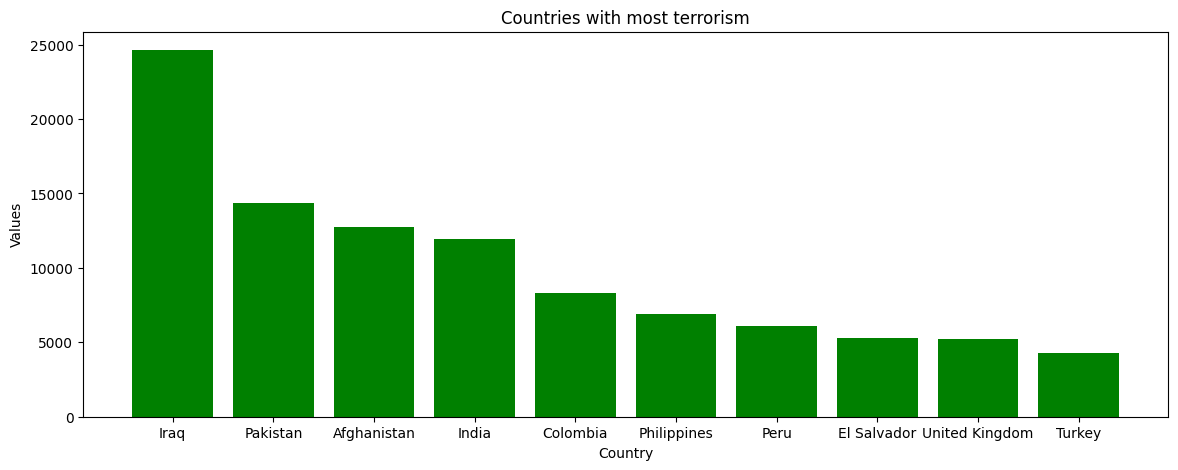

In [160]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(countries_with_most_terrorism.index,countries_with_most_terrorism.values,color='g')
plt.title('Countries with most terrorism')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

In [33]:
print(countries)

['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey']


From the above graph it is clear that Iraq is the country with most terrorism.

In [34]:
data.iyear.value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: iyear, dtype: int64

In [46]:
corelation=data.corr()
print(corelation)

            eventid     iyear    imonth      iday  extended   country  \
eventid    1.000000  0.999996  0.002706  0.018336  0.091761 -0.135039   
iyear      0.999996  1.000000  0.000139  0.018254  0.091754 -0.135023   
imonth     0.002706  0.000139  1.000000  0.005497 -0.000468 -0.006305   
iday       0.018336  0.018254  0.005497  1.000000 -0.004700  0.003468   
extended   0.091761  0.091754 -0.000468 -0.004700  1.000000 -0.020466   
...             ...       ...       ...       ...       ...       ...   
nreleased -0.181612 -0.181556 -0.011535  0.001765 -0.192155 -0.044331   
INT_LOG   -0.143600 -0.143601 -0.002302 -0.001540  0.071768  0.069904   
INT_IDEO  -0.133252 -0.133253 -0.002034 -0.001621  0.075147  0.067564   
INT_MISC  -0.077852 -0.077847 -0.002554 -0.002027  0.027335  0.207281   
INT_ANY   -0.175605 -0.175596 -0.006336 -0.001199  0.080767  0.153118   

             region  latitude  longitude  specificity  ...  ransomamt  \
eventid    0.401371  0.166886   0.003907     0.030

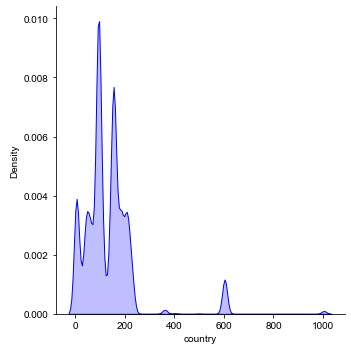

In [65]:
sns.displot(data,x='country',kind='kde',fill='tree',palette='colorblind',color='b')
sns.set_style("darkgrid")

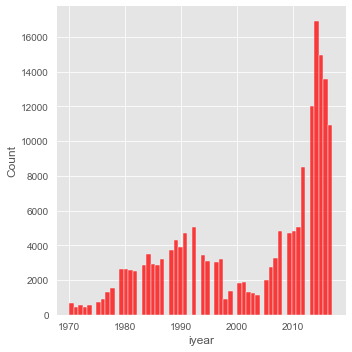

In [67]:
sns.displot(data,x='iyear',kind='hist',palette='colorblind',color='r')
plt.style.use("ggplot")

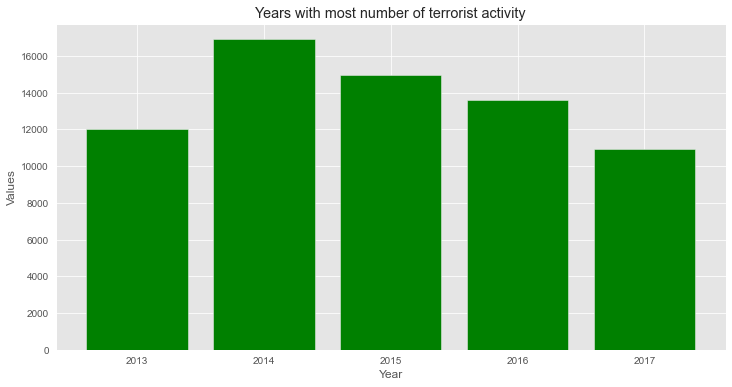

In [70]:
year = data.iyear.value_counts().head(5)
plt.figure(figsize=(12,6))
plt.bar(year.index,year.values,color='g')
plt.title("Years with most number of terrorist activity")
plt.xlabel("Year")
plt.ylabel("Values")
plt.show()
plt.style.use("ggplot")

2014 was recorded to have most number of terrorist attacks.

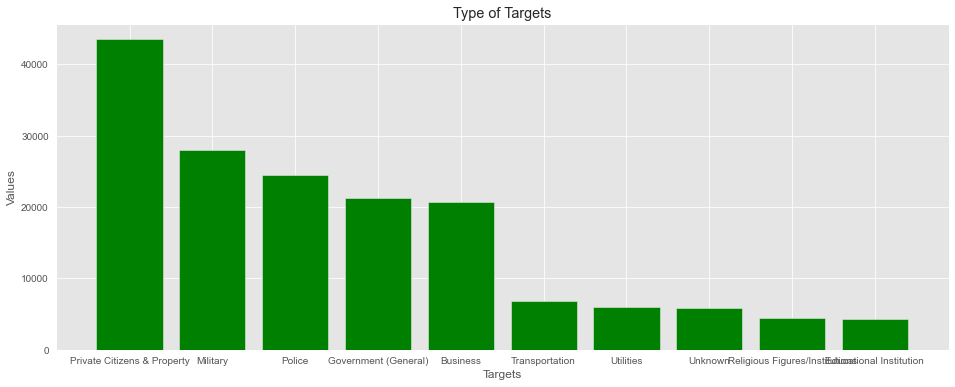

In [88]:
target = data['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(16,6))
ax.bar(target.index,target.values,color='g')
plt.title('Type of Targets')
plt.xlabel("Targets")
plt.ylabel("Values")
plt.show()

So we find that Private Citizens and property were targeted the most.

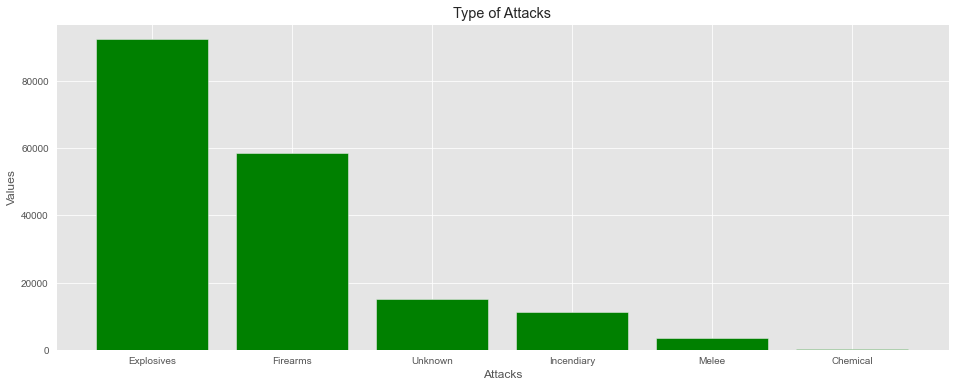

In [92]:
weapon_type = data['weaptype1_txt'].value_counts().head(6)
fig,ax = plt.subplots(figsize=(16,6))
ax.bar(weapon_type.index,weapon_type.values,color='g')
plt.title('Type of Attacks')
plt.xlabel("Attacks")
plt.ylabel("Values")
plt.show()

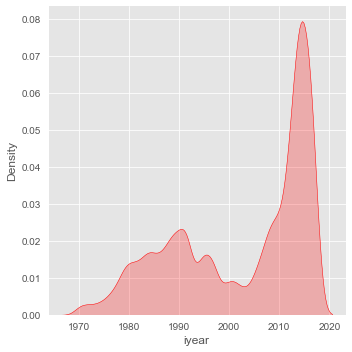

In [102]:
sns.displot(data,x='iyear',kind='kde',fill='tree',palette='colorblind',color='red')

<AxesSubplot:xlabel='iyear'>

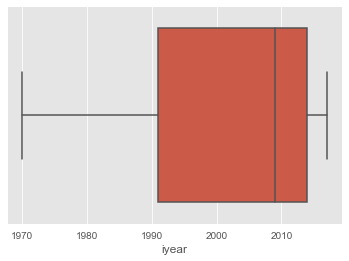

In [94]:
sns.boxplot(x=data['iyear'])

<function matplotlib.pyplot.show(close=None, block=None)>

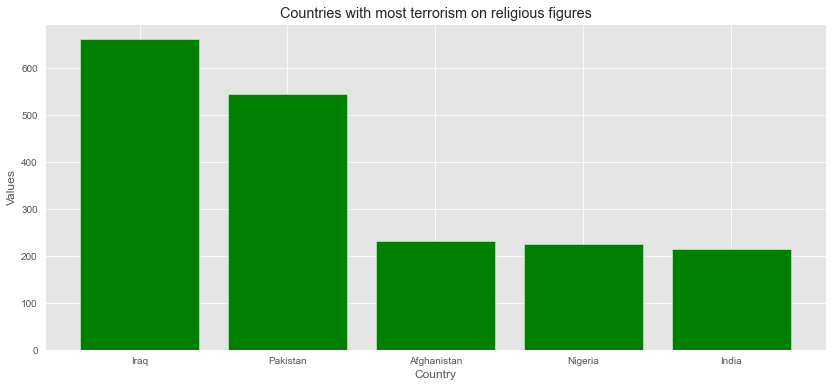

In [106]:
religious_target = data[data['targtype1_txt']=='Religious Figures/Institutions']
plt.figure(figsize=(14,6))
plt.bar(religious_target['country_txt'].value_counts().head().index,religious_target['country_txt'].value_counts().head().values,color='g')
plt.title("Countries with most terrorism on religious figures")
plt.xlabel("Country")
plt.ylabel("Values")
plt.show

Iraq is the country with most terrorism due to religious reasons.

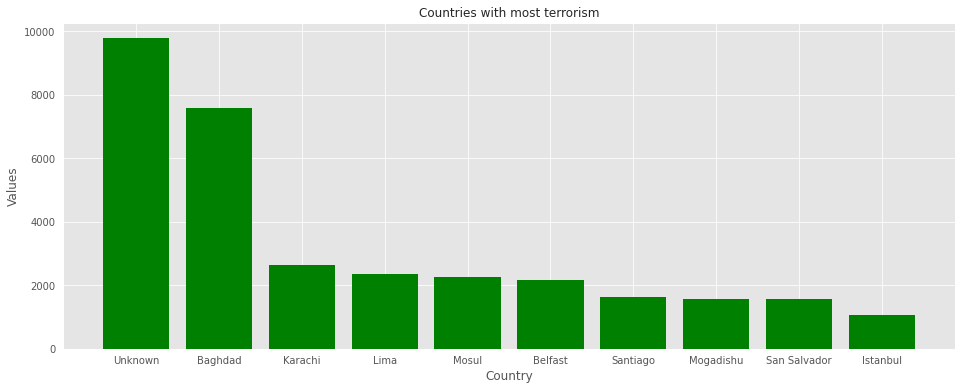

In [111]:
cities_with_most_terrorism = data.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism
fig,ax = plt.subplots(figsize=(16,6))
plt.style.use('default')
ax.bar(cities_with_most_terrorism.index,cities_with_most_terrorism.values,color='g')
plt.title('Countries with most terrorism')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

<Figure size 200x200 with 0 Axes>

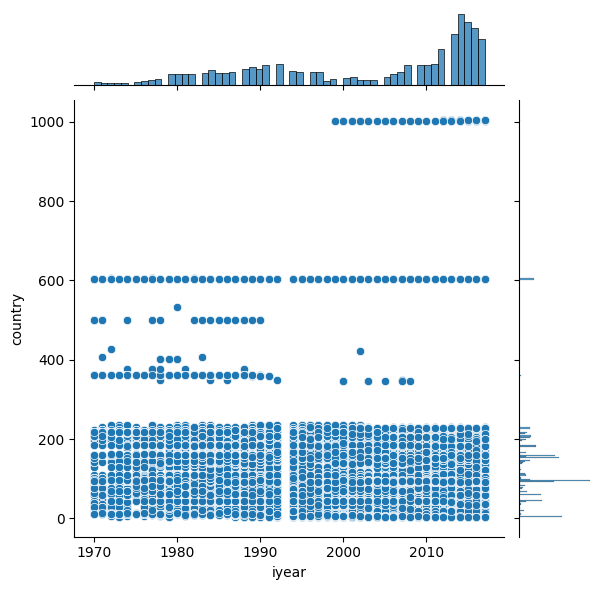

<Figure size 200x200 with 0 Axes>

In [118]:
sns.jointplot(x=data['iyear'],y=data['country'])
plt.figure(figsize=(2,2))

<AxesSubplot:xlabel='country', ylabel='Density'>

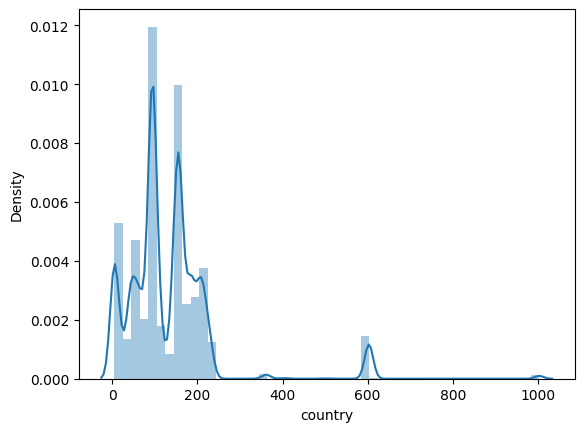

In [126]:
sns.distplot(a=data['country'])

<AxesSubplot:xlabel='country', ylabel='iyear'>

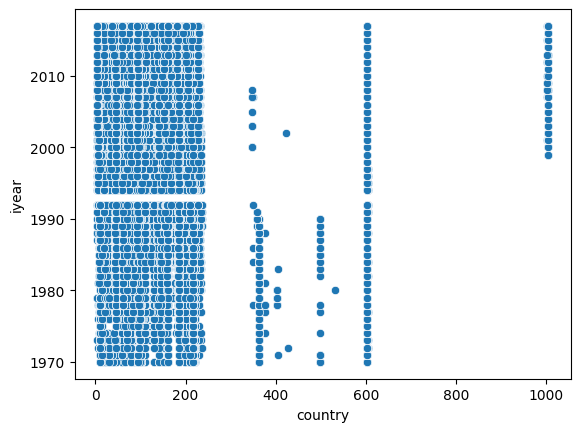

In [131]:
sns.scatterplot(x=data['country'],y=data['iyear'])

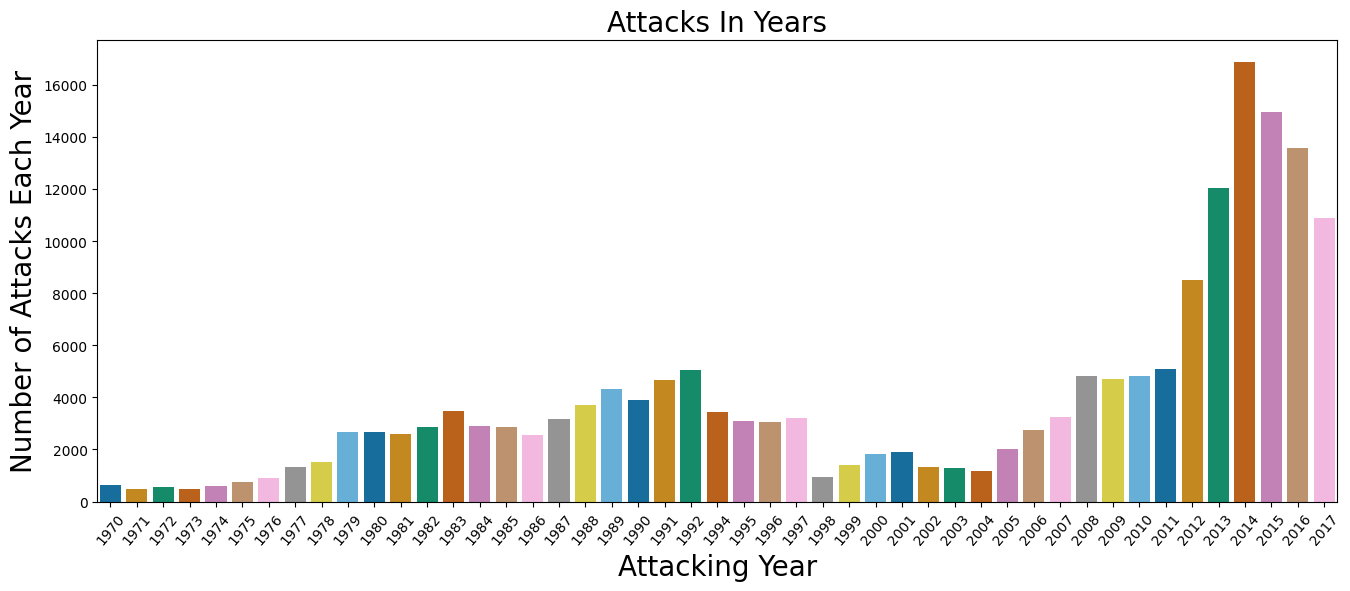

In [151]:
year = data['iyear'].unique()
years_count = data['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,6))
sns.barplot(x = year,
           y = years_count,
           palette = "colorblind")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=20)
plt.show()

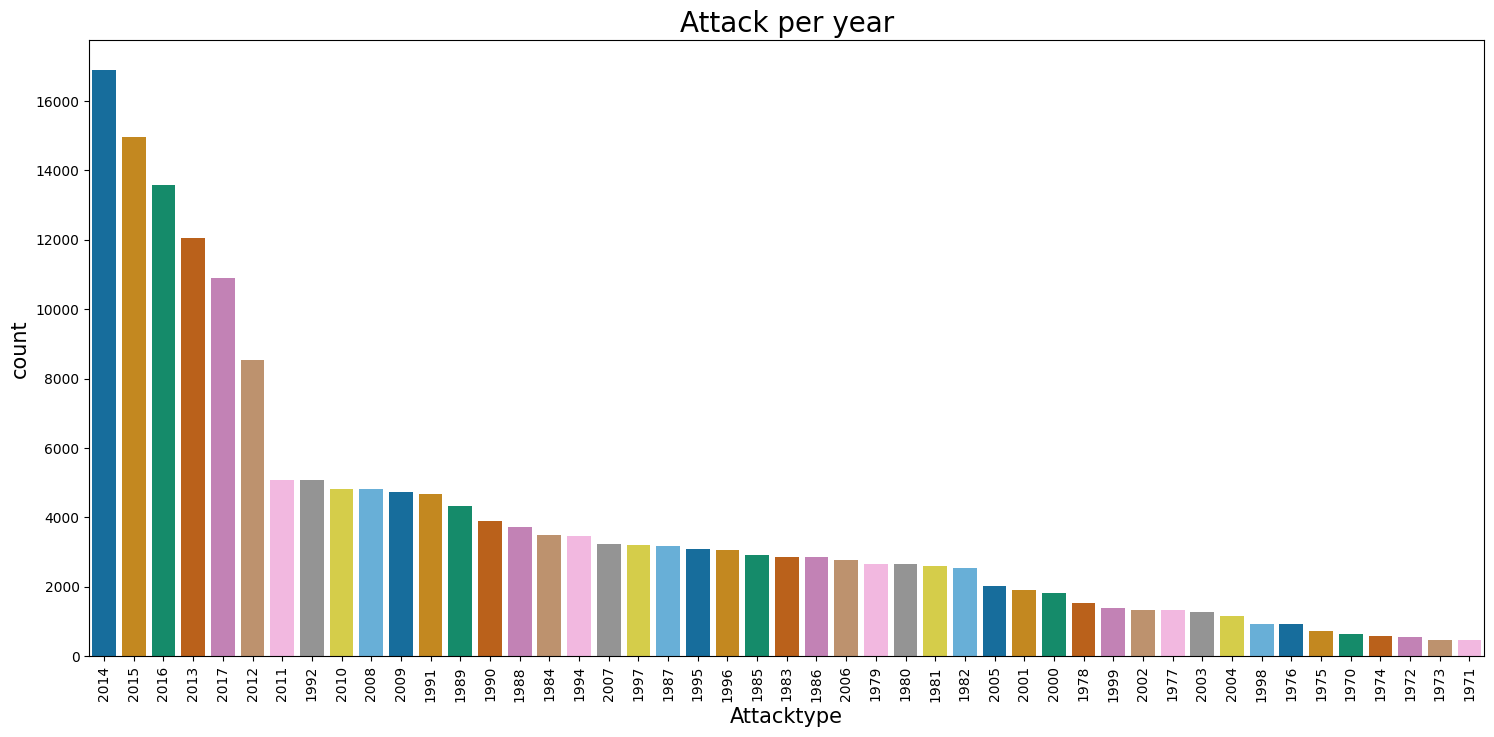

In [150]:
plt.subplots(figsize=(18,8))
sns.countplot(data["iyear"],order=data['iyear'].value_counts().index,palette="colorblind")
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

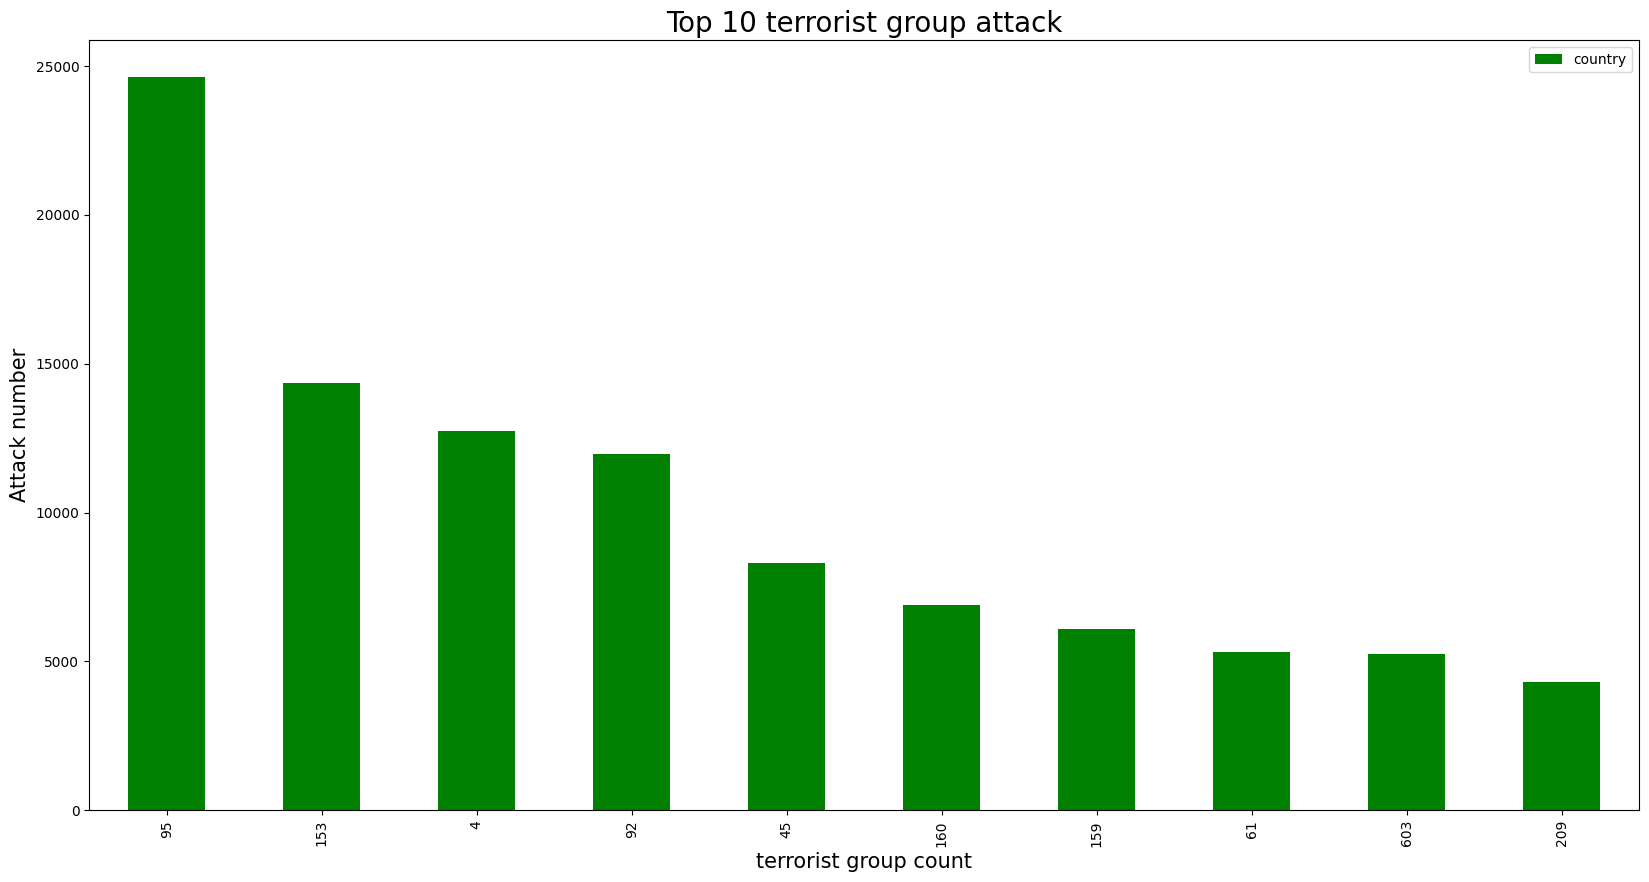

In [159]:
data['country'].value_counts().to_frame().head(10).plot(kind='bar',color='g',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group count",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

# CONCLUSIONS:



1.Country with the most attacks: Iraq

2.Regions with most Attack:Private Citizens & Property. 

3.Year with the most attacks: 2014

4.Month with the most attacks: 5

5.Most Attack Types: Bombing/Explosion

6.City with the most attacks: Baghdad